In [1]:
# result comparison between deployments, encounters

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
result_path  = '/home/ys587/__Data/__whistle/__whistle_30_species/__fit_result_species/__final'

In [4]:
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
num_species = len(species_dict)
species_list = list(species_dict.keys())
species_id = list(species_dict.values())

In [5]:
## result folders


In [6]:
# split_type = 'deployment'
# split_type = 'encounter'
# split_type = 'clip'

# run 0 
# split_type = 'deployment'
# target_split_folder = '20210614_202736_deployment_run0_mixup_spp'
split_type = 'encounter'
target_split_folder = '20210623_162002_encounter_run0_mixup_spp'
# split_type = 'clip'
# target_split_folder = '20210623_162213_clip_run0_mixup_spp'

# deploy_split_folder = '20210520_155025_deployment_run0_spp'
# encounter_split_folder = '20210520_104352_encounter_run0_spp'
# clip_split_folder = '20210523_204759_clip_run0_spp'

# Deployment split

In [7]:
if split_type == 'deployment':
    # deployment: e.g. STAR2006_test_results.npz
    deployment_list = ['STAR2000', 'STAR2003', 'STAR2006', 'HICEAS2002', 'PICEAS2005']

    # for ii in range(len(deployment_list)):
    label_test_all  = []
    label_pred_all = []
    for ee in deployment_list:
        label_temp = np.load(os.path.join(result_path, target_split_folder, ee+'_test_results.npz'))
        label_test_all.append(label_temp['label_test'])
        label_pred_all.append(label_temp['label_pred'])
    label_pred_all = np.concatenate(label_pred_all)
    label_test_all = np.concatenate(label_test_all)

    print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None2, output_dict=False, zero_division='warn')
    np.set_printoptions(linewidth=200, precision=3, suppress=True)
    
    print("Confusion matrix:")
    # cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
    cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

    cm2 = cm*1.0
    for ii in range(cm.shape[0]):
        cm_row = cm[ii, :]*1.0

        cm_row_sum = cm_row.sum()
        if cm_row_sum != 0:
            cm2[ii, :] = cm_row / cm_row_sum
        else:
            cm2[ii, :] = np.zeros(cm.shape[1])
    
    print(species_list)
    print('')
    print(cm)
    print('')
    print(cm2)

    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)
    
    fig, ax = plt.subplots(figsize=[15, 15])
    disp.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format=None, colorbar=True)
    
    fig, ax = plt.subplots(figsize=[15, 15])
    disp2.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format='.3f', colorbar=True)


# Enounter split

              precision    recall  f1-score   support

          BD      0.459     0.514     0.485      2160
          CD      0.585     0.717     0.644      4715
         STR      0.411     0.408     0.409      2691
         SPT      0.394     0.220     0.282      2392
        SPIN      0.216     0.161     0.185      1123
         PLT      0.520     0.607     0.560      2164
          RT      0.405     0.476     0.438      1404
         FKW      0.688     0.575     0.627      3425

    accuracy                          0.510     20074
   macro avg      0.460     0.460     0.454     20074
weighted avg      0.503     0.510     0.500     20074

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[1110  207  202  189  237   92   76   47]
 [  69 3379  675  291   80  113   48   60]
 [ 188  826 1098  163  120  162   20  114]
 [ 410  823  357  526  149  108    9   10]
 [ 308  300  129   90  181   12   74   29]
 [ 211  107  116   47   28 1313   53  289]
 [  82   60   32 

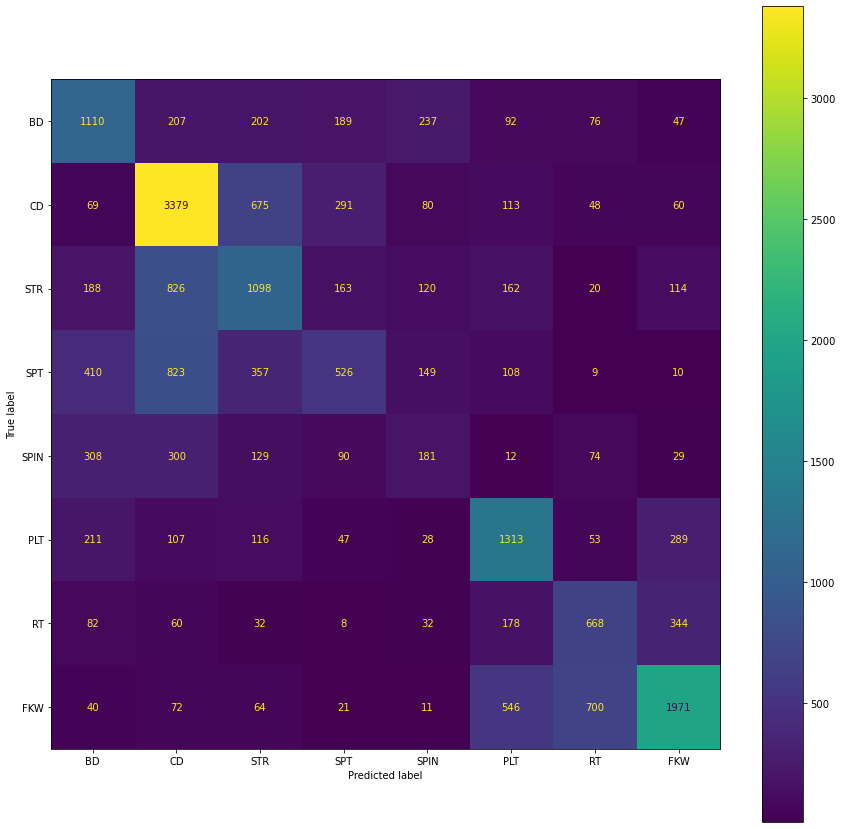

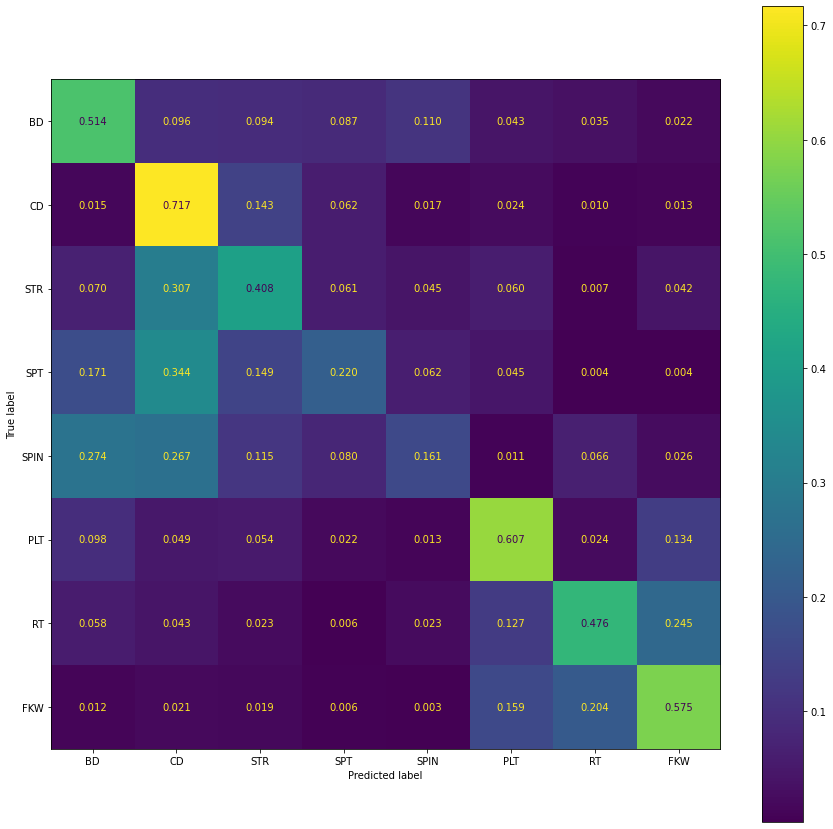

In [8]:
if split_type == 'encounter':
    # enounter: e.g. fold0_test_results.npz, 
    encounter_list = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']
    # result_encounter = np.load(os.path.join(result_path, '20210520_104352_encounter'))

    # for ii in range(len(encounter_list)):
    label_test_all  = []
    label_pred_all = []
    for ee in encounter_list:
        label_temp = np.load(os.path.join(result_path, target_split_folder, ee+'_test_results.npz'))
        label_test_all.append(label_temp['label_test'])
        label_pred_all.append(label_temp['label_pred'])
    label_pred_all = np.concatenate(label_pred_all)
    label_test_all = np.concatenate(label_test_all)

    print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

    np.set_printoptions(linewidth=200, precision=3, suppress=True)

    print("Confusion matrix:")
    # cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
    cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

    cm2 = cm*1.0
    for ii in range(cm.shape[0]):
        cm_row = cm[ii, :]*1.0

        cm_row_sum = cm_row.sum()
        if cm_row_sum != 0:
            cm2[ii, :] = cm_row / cm_row_sum
        else:
            cm2[ii, :] = np.zeros(cm.shape[1])
            
    print(species_list)
    print('')
    print(cm)
    print('')
    print(cm2)

    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format=None, colorbar=True)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp2.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format='.3f', colorbar=True)

# Clip split

In [9]:
if split_type == 'clip':
    # clip: e.g. fold0_test_results.npz, 
    clip_list = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']

    # for ii in range(len(clip_list)):
    label_test_all  = []
    label_pred_all = []
    for ee in clip_list:
        label_temp = np.load(os.path.join(result_path, target_split_folder, ee+'_test_results.npz'))
        label_test_all.append(label_temp['label_test'])
        label_pred_all.append(label_temp['label_pred'])
    label_pred_all = np.concatenate(label_pred_all)
    label_test_all = np.concatenate(label_test_all)

    print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None, output_dict=False, zero_division='warn')

    np.set_printoptions(linewidth=200, precision=3, suppress=True)

    print("Confusion matrix:")
    # cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
    cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

    cm2 = cm*1.0
    for ii in range(cm.shape[0]):
        cm_row = cm[ii, :]*1.0

        cm_row_sum = cm_row.sum()
        if cm_row_sum != 0:
            cm2[ii, :] = cm_row / cm_row_sum
        else:
            cm2[ii, :] = np.zeros(cm.shape[1])
            
    print(species_list)
    print('')
    print(cm)
    print('')
    print(cm2)

    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format=None, colorbar=True)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp2.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format='.3f', colorbar=True)